This notebook converts the Ifremer dataset into subfiles matching the campaigns.

In [32]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import h5netcdf
# from matplotlib import cm
# import matplotlib.dates as mdates
# import cartopy.crs as ccrs
ds = xr.load_dataset('../../data/fluxes_all_cruises_compilation.nc')

All the cruises:
Metz =  77; Epic = 69; WHOTS = 87; STRATUS = 83; NEAQS = 78; HiWInGS = 72; GasEx = 71
DYNAMO = 68; Calwater = 67; Capricorn = 73

Calwater(67): 2015-01-16 to 2015-02-10

In [2]:
ds_cw = ds.where(ds.pcode==67, drop=True)
time_masked = ds_cw.time
print(time_masked)

<xarray.DataArray 'time' (time: 624)>
array(['2015-01-16T00:24:59.990400000', '2015-01-16T01:30:00.000000000',
       '2015-01-16T02:30:00.028800000', ..., '2015-02-10T21:24:59.990400000',
       '2015-02-10T22:30:00.000000000', '2015-02-10T23:30:00.028800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T00:24:59.990400 ... 2015-02-10T...


In [ ]:
# We can later include the interpolated fields into the ds_cw file
# ustar_ERA5_t = []; vstar_ERA5_t = []
# for i in range(0,len(time_masked)):
#     t = time_masked.values[i] # Can I get a unique index here?
#     U = ds.U.sel(time=t)
#     ti = ds.time.sel(time=t).values; 
#     loni = ds.lon.sel(time=t).values; 
#     lati = ds.lat.sel(time=t).values; 
#     ustar_ERA5 = ds_ERA5.uust.interp(time=ti,longitude=loni,latitude=lati)
#     vstar_ERA5 = ds_ERA5.vust.interp(time=ti,longitude=loni,latitude=lati)
#     ustar_ERA5_t.append(ustar_ERA5); vstar_ERA5_t.append(vstar_ERA5)

In [3]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2015
# Jan
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g01.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Feb
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g02.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2015-01-15T00:00:00.000000000', '2015-02-11T00:00:00.000000000'))


In [4]:
# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2015_Calwater.nc',engine='h5netcdf')

HiWInGS(72): 2013-09-14 to 2013-11-12

In [33]:
ds_hw = ds.where(ds.pcode==72, drop=True)
time_masked = ds_hw.time
print(time_masked)

<xarray.DataArray 'time' (time: 1296)>
array(['2013-09-14T00:24:59.904000000', '2013-09-14T01:30:00.000000000',
       '2013-09-14T02:30:00.115200000', ..., '2013-11-12T21:24:59.904000000',
       '2013-11-12T22:30:00.000000000', '2013-11-12T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-09-14T00:24:59.904000 ... 2013-11-12T...


In [ ]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2013
# Sep
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g09.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Oct
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g10.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
# Nov
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g11.nc' %YR
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2013-09-13', '2013-11-13'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2013_HiWInGS.nc')


In [38]:
# ustar_ERA5_t = []; vstar_ERA5_t = []
pdir0_ERA5 = []; phs0_ERA5 = []; plp0_ERA5 = []
pdir1_ERA5 = []; phs1_ERA5 = []; plp1_ERA5 = []

for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can I get a unique index here?
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    phs0_ = ds_ERA5_short.phs0.interp(time=ti,longitude=loni,latitude=lati)
    pdir0_ = ds_ERA5_short.pdir0.interp(time=ti,longitude=loni,latitude=lati)
    plp0_ = ds_ERA5_short.plp0.interp(time=ti,longitude=loni,latitude=lati)
    phs1_ = ds_ERA5_short.phs1.interp(time=ti,longitude=loni,latitude=lati)
    pdir1_ = ds_ERA5_short.pdir1.interp(time=ti,longitude=loni,latitude=lati)
    plp1_ = ds_ERA5_short.plp1.interp(time=ti,longitude=loni,latitude=lati)
    phs0_ERA5.append(phs0_); pdir0_ERA5.append(pdir0_); plp0_ERA5.append(plp0_)
    phs1_ERA5.append(phs1_); pdir1_ERA5.append(pdir1_); plp1_ERA5.append(plp1_)

/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.

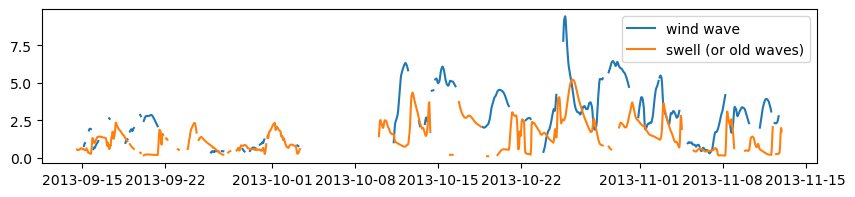

In [44]:
plt.figure(figsize=[10,2])
plt.plot(time_masked,phs0_ERA5,label='wind wave')
plt.plot(time_masked,phs1_ERA5,label='swell (or old waves)')
plt.legend()

/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:560: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x.values)
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/xarray/core/missing.py:561: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x.

Text(0, 0.5, '$u_*$ (m/s)')

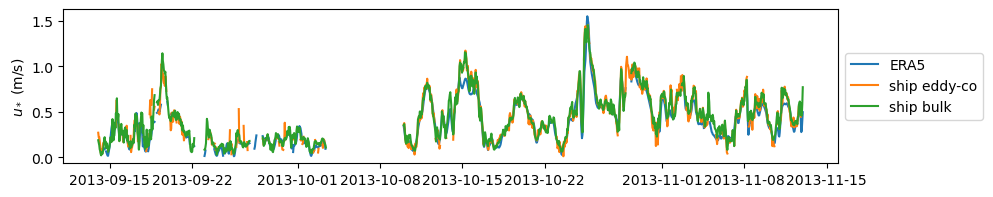

In [21]:
# Interpolation
plt.figure(figsize=[10,2])
ustar_ERA5_t = []; vstar_ERA5_t = []

for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can I get a unique index here?
    U = ds.U.sel(time=t)
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    ustar_ERA5 = ds_ERA5.uust.interp(time=ti,longitude=loni,latitude=lati)
    vstar_ERA5 = ds_ERA5.vust.interp(time=ti,longitude=loni,latitude=lati)
    ustar_ERA5_t.append(ustar_ERA5); vstar_ERA5_t.append(vstar_ERA5)

Ustar_ERA5_t = (np.array(ustar_ERA5_t)**2 + np.array(vstar_ERA5_t)**2)**0.5  
plt.plot(time_masked, Ustar_ERA5_t, label='ERA5')
plt.plot(time_masked, ds_hw.taucx[:]**0.5, label='ship eddy-co')
plt.plot(time_masked, ds_hw.taub[:]**0.5, label='ship bulk')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$u_*$ (m/s)')

Capricorn(73): 2016-03-14 to 2016-04-13

In [22]:
ds_73 = ds.where(ds.pcode==73, drop=True)
time_masked = ds_73.time
print(time_masked)

<xarray.DataArray 'time' (time: 191)>
array(['2016-03-14T07:00:00.028800000', '2016-03-14T07:59:59.971200000',
       '2016-03-14T09:00:00.000000000', '2016-03-14T10:00:00.028800000',
       '2016-03-14T10:59:59.971200000', '2016-03-14T12:00:00.000000000',
       '2016-03-14T13:00:00.028800000', '2016-03-14T13:59:59.971200000',
       '2016-03-14T16:00:00.028800000', '2016-03-14T16:59:59.971200000',
       '2016-03-14T18:00:00.000000000', '2016-03-14T19:00:00.028800000',
       '2016-03-14T19:59:59.971200000', '2016-03-14T21:00:00.000000000',
       '2016-03-14T22:00:00.028800000', '2016-03-14T22:59:59.971200000',
       '2016-03-15T03:00:00.000000000', '2016-03-15T04:00:00.028800000',
       '2016-03-15T04:59:59.971200000', '2016-03-15T07:59:59.971200000',
       '2016-03-17T13:59:59.971200000', '2016-03-17T15:00:00.000000000',
       '2016-03-17T16:00:00.028800000', '2016-03-17T16:59:59.971200000',
       '2016-03-17T19:59:59.971200000', '2016-03-17T21:00:00.000000000',
       '2016-

In [23]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2016
# Mar
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g03.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Apr
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g04.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2016-03-13T00:00:00.000000000', '2016-04-13T00:00:00.000000000'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2016_Capricorn.nc',engine='h5netcdf')


Text(0, 0.5, '$u_*$ (m/s)')

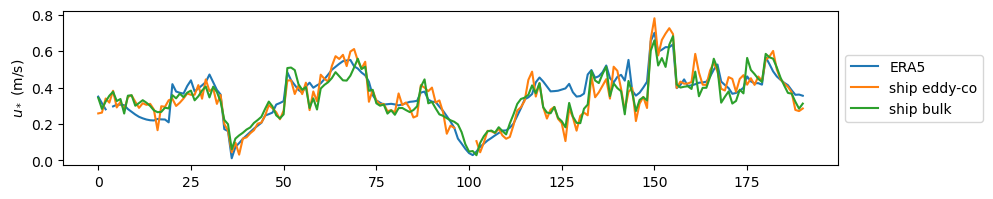

In [16]:
# Interpolation
plt.figure(figsize=[10,2])
ustar_ERA5_t = []; vstar_ERA5_t = []

for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can I get a unique index here?
    U = ds.U.sel(time=t)
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    ustar_ERA5 = ds_ERA5.uust.interp(time=ti,longitude=loni,latitude=lati)
    vstar_ERA5 = ds_ERA5.vust.interp(time=ti,longitude=loni,latitude=lati)
    ustar_ERA5_t.append(ustar_ERA5); vstar_ERA5_t.append(vstar_ERA5)

Ustar_ERA5_t = (np.array(ustar_ERA5_t)**2 + np.array(vstar_ERA5_t)**2)**0.5  
plt.plot(Ustar_ERA5_t, label='ERA5')
plt.plot(ds_73.taucx[:]**0.5, label='ship eddy-co')
plt.plot(ds_73.taub[:]**0.5, label='ship bulk')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$u_*$ (m/s)')

DYNAMO(68): 2011-09-03 to 2011-12-31

In [76]:
ds_68 = ds.where(ds.pcode==68, drop=True)
time_masked = ds_68.time
print(time_masked)

<xarray.DataArray 'time' (time: 2221)>
array(['2011-09-03T00:24:59.904000000', '2011-09-03T01:30:00.000000000',
       '2011-09-03T02:30:00.115200000', ..., '2011-12-31T21:24:59.904000000',
       '2011-12-31T22:30:00.000000000', '2011-12-31T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-09-03T00:24:59.904000 ... 2011-12-31T...


In [69]:
basepath = '/Users/jwu/Work/Dabble/Waves/'
YR = 2011
# Sep
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g09.nc' %YR
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
# Oct
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g10.nc' %YR
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
# Nov
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g11.nc' %YR
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})
# Dec
file = basepath + 'data/LOPS_WW3-GLOB-30M_%g12.nc' %YR
ds4 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3,ds4], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2011-09-02', '2011-12-31'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
ds_ERA5_short.to_netcdf('../../data/ERA5/2011_DYNAMO.nc',engine='h5netcdf')

Text(0, 0.5, '$u_*$ (m/s)')

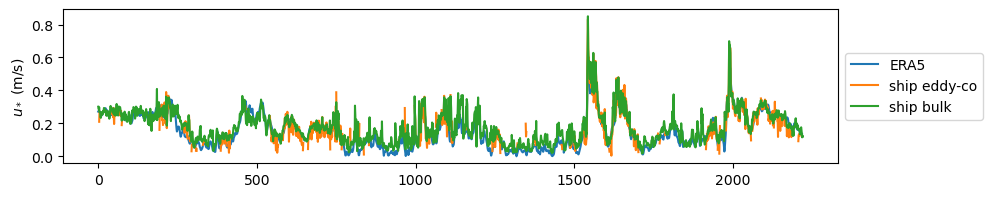

In [77]:
plt.figure(figsize=[10,2])
ustar_ERA5_t = []; vstar_ERA5_t = []

for i in range(0,len(time_masked)):
    t = time_masked.values[i] # Can I get a unique index here?
    ti = ds.time.sel(time=t).values; 
    loni = ds.lon.sel(time=t).values; 
    lati = ds.lat.sel(time=t).values; 
    ustar_ERA5 = ds_ERA5_short.uust.interp(time=ti,longitude=loni,latitude=lati)
    vstar_ERA5 = ds_ERA5_short.vust.interp(time=ti,longitude=loni,latitude=lati)
    ustar_ERA5_t.append(ustar_ERA5); vstar_ERA5_t.append(vstar_ERA5)

Ustar_ERA5_t = (np.array(ustar_ERA5_t)**2 + np.array(vstar_ERA5_t)**2)**0.5  
plt.plot(Ustar_ERA5_t, label='ERA5')
plt.plot(ds_68.taucx[:]**0.5, label='ship eddy-co')
plt.plot(ds_68.taub[:]**0.5, label='ship bulk')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$u_*$ (m/s)')

STRATUS(83): 2001-10-10 to 2010-01-28 intermittent

In [7]:
ds_83 = ds.where(ds.pcode==83, drop=True)
time_masked = ds_83.time
print(time_masked)
# 2001-10,2004-12,2005-10,2006-10,2007-10,2007-11,2008-10,2008-11,2008-12,2010-01

<xarray.DataArray 'time' (time: 3083)>
array(['2001-10-10T00:24:59.904000000', '2001-10-10T01:30:00.000000000',
       '2001-10-10T02:30:00.288000000', ..., '2010-01-28T21:24:59.904000000',
       '2010-01-28T22:30:00.000000000', '2010-01-28T23:30:00.288000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-10-10T00:24:59.904000 ... 2010-01-28T...


In [5]:
basepath = '/Users/jwu/Work/Dabble/Waves/'

file = basepath + 'data/LOPS_WW3-GLOB-30M_200110.nc' 
ds1 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200412.nc' 
ds2 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200510.nc'
ds3 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200610.nc'
ds4 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200710.nc'
ds5 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200711.nc'
ds6 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200810.nc'
ds7 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200811.nc'
ds8 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_200812.nc'
ds9 = xr.open_dataset(file,chunks={'time':'500MB'})
file = basepath + 'data/LOPS_WW3-GLOB-30M_201001.nc'
ds10 = xr.open_dataset(file,chunks={'time':'500MB'})

ds_ERA5 = xr.concat([ds1,ds2,ds3,ds4,ds5,ds6,ds7,ds8,ds9,ds10], dim="time")
ds_ERA5_short = ds_ERA5.sel(time=slice('2001-10-10', '2010-01-28'))

# For now we keep info of first 3 partitions
fields = ['uwnd','vwnd','ucur','vcur','hs','dir','uust','vust',
          'phs0','pdir0','plp0','phs1','pdir1','plp1','phs2','pdir2','plp2']
ds_ERA5_short = ds_ERA5_short[fields]

# Writing the file and it takes about half a minute with h5netcdf
# ds_ERA5_short.to_netcdf('../../data/ERA5/2011_DYNAMO.nc',engine='h5netcdf')

In [12]:
uust = ds_ERA5_short.uust.interp(time=ds_83.time,longitude=ds_83.lon,latitude=ds_83.lat)
vust = ds_ERA5_short.vust.interp(time=ds_83.time,longitude=ds_83.lon,latitude=ds_83.lat)
ust = (uust**2+vust**2)**0.5

(-50.0, 10.0)

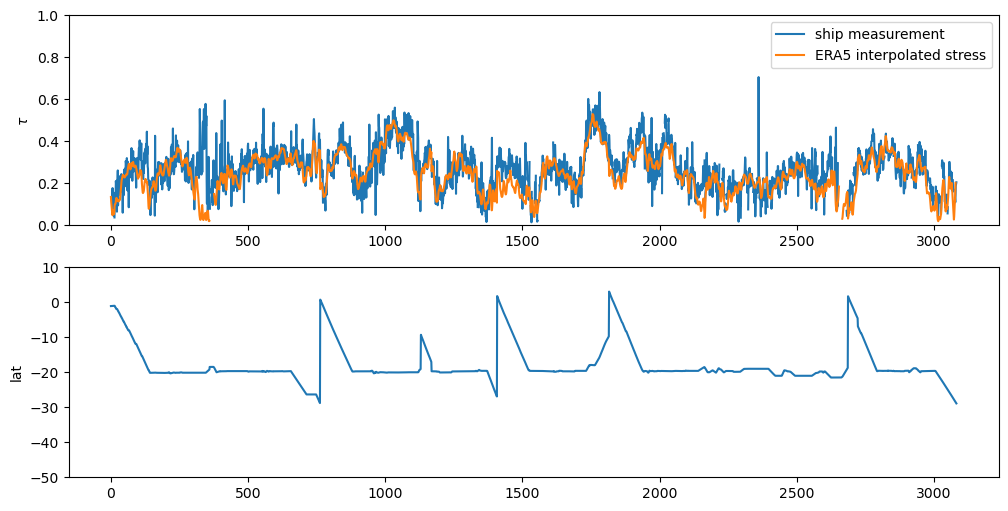

In [17]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12, 6))
ax1.plot(ds_83.taucx**0.5, label='ship measurement')
ax1.plot(ust, label='ERA5 interpolated stress')
ax1.set_ylabel(r'$\tau$')
ax1.set_ylim([0,1])
ax1.legend()
ax2.plot(ds_83.lat)
ax2.set_ylabel('lat')
ax2.set_ylim([-50,10])

Epic(69): 1999-11-02 to 2004-11-27

In [2]:
ds_69 = ds.where(ds.pcode==69, drop=True)
time_masked = ds_69.time
print(time_masked)

<xarray.DataArray 'time' (time: 6882)>
array(['1999-11-02T03:24:59.040000000', '1999-11-02T04:30:00.000000000',
       '1999-11-02T05:30:01.152000000', ..., '2004-11-27T21:24:59.904000000',
       '2004-11-27T22:30:00.000000000', '2004-11-27T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-11-02T03:24:59.040000 ... 2004-11-27T...


In [27]:
ds_69.time.sel(time="2004")

<xarray.DataArray 'time' (time: 714)>
array(['2004-10-29T06:24:59.904000000', '2004-10-29T07:30:00.000000000',
       '2004-10-29T08:30:00.115200000', ..., '2004-11-27T21:24:59.904000000',
       '2004-11-27T22:30:00.000000000', '2004-11-27T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2004-10-29T06:24:59.904000 ... 2004-11-27T...

In [44]:
basepath = '/Users/jwu/Work/Dabble/Waves/'

months=['199911','199912',
        '200004','200005','200006','200007','200008','200009','200010','200011',
        '200103','200104','200105','200106','200107','200108','200109','200110','200111','200112',
        '200203','200204','200205','200206','200207','200208','200209','200210','200211',
        '200311','200410','200411']

month = months[0]
file = basepath + 'data/LOPS_WW3-GLOB-30M_' + month +'.nc' 
ds_ERA5 = xr.open_dataset(file,chunks={'time':'500MB'})
for month in months[1:]:
    file = basepath + 'data/LOPS_WW3-GLOB-30M_' + month +'.nc' 
    dsmonth = xr.open_dataset(file,chunks={'time':'500MB'})
    ds_ERA5 = xr.concat([ds_ERA5,dsmonth],dim='time')

(-50.0, 10.0)

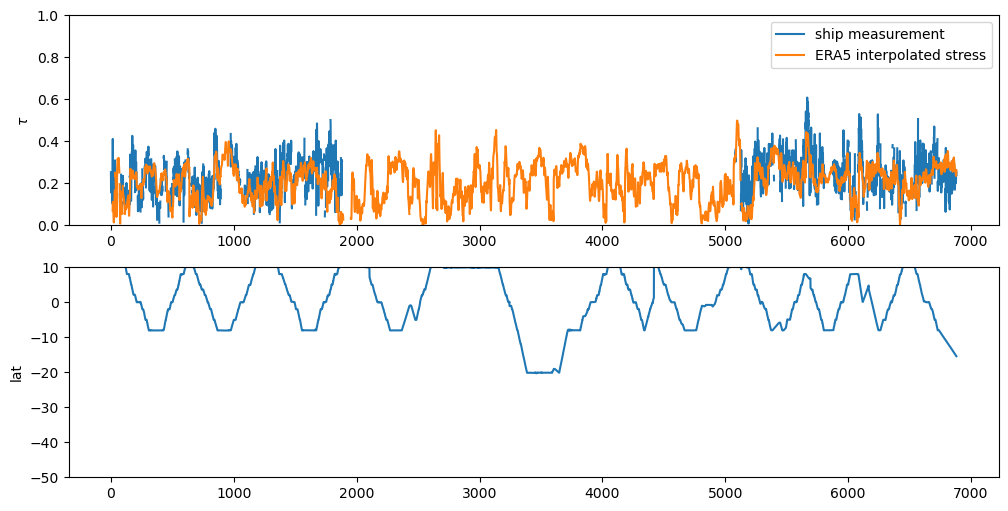

In [46]:
uust = ds_ERA5.uust.interp(time=ds_69.time,longitude=ds_69.lon,latitude=ds_69.lat)
vust = ds_ERA5.vust.interp(time=ds_69.time,longitude=ds_69.lon,latitude=ds_69.lat)
ust = (uust**2+vust**2)**0.5
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12, 6))
ax1.plot(ds_69.taucx**0.5, label='ship measurement')
ax1.plot(ust, label='ERA5 interpolated stress')
ax1.set_ylabel(r'$\tau$')
ax1.set_ylim([0,1])
ax1.legend()
ax2.plot(ds_69.lat)
ax2.set_ylabel('lat')
ax2.set_ylim([-50,10])

WHOTS(87)

In [33]:
ds_87 = ds.where(ds.pcode==87, drop=True)
time_masked = ds_87.time

print(time_masked)
# ds_87.time.sel(time="2004")

<xarray.DataArray 'time' (time: 1104)>
array(['2009-07-10T00:24:59.904000000', '2009-07-10T01:30:00.000000000',
       '2009-07-10T02:30:00.115200000', ..., '2015-07-16T21:24:59.904000000',
       '2015-07-16T22:30:00.000000000', '2015-07-16T23:30:00.115200000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2009-07-10T00:24:59.904000 ... 2015-07-16T...


In [ ]:
months=['200907','201107','201206','201307','201407','201507']

In [43]:
ds_87.time.sel(time="2012")

<xarray.DataArray 'time' (time: 168)>
array(['2012-06-13T00:24:59.904000000', '2012-06-13T01:30:00.000000000',
       '2012-06-13T02:30:00.115200000', '2012-06-13T03:24:59.904000000',
       '2012-06-13T04:30:00.000000000', '2012-06-13T05:30:00.115200000',
       '2012-06-13T06:24:59.904000000', '2012-06-13T07:30:00.000000000',
       '2012-06-13T08:30:00.115200000', '2012-06-13T09:24:59.904000000',
       '2012-06-13T10:30:00.000000000', '2012-06-13T11:30:00.115200000',
       '2012-06-13T12:24:59.904000000', '2012-06-13T13:30:00.000000000',
       '2012-06-13T14:30:00.115200000', '2012-06-13T15:24:59.904000000',
       '2012-06-13T16:30:00.000000000', '2012-06-13T17:30:00.115200000',
       '2012-06-13T18:24:59.904000000', '2012-06-13T19:30:00.000000000',
       '2012-06-13T20:30:00.115200000', '2012-06-13T21:24:59.904000000',
       '2012-06-13T22:30:00.000000000', '2012-06-13T23:30:00.115200000',
       '2012-06-14T00:24:59.904000000', '2012-06-14T01:30:00.000000000',
       '2012-06-14T02:30:00.115200000', '2012-06-14T03:24:59.904000000',
       '2012-06-14T04:30:00.000000000', '2012-06-14T05:30:00.115200000',
       '2012-06-14T06:24:59.904000000', '2012-06-14T07:30:00.000000000',
       '2012-06-14T08:30:00.115200000', '2012-06-14T09:24:59.904000000',
       '2012-06-14T10:30:00.000000000', '2012-06-14T11:30:00.115200000',
       '2012-06-14T12:24:59.904000000', '2012-06-14T13:30:00.000000000',
       '2012-06-14T14:30:00.115200000', '2012-06-14T15:24:59.904000000',
       '2012-06-14T16:30:00.000000000', '2012-06-14T17:30:00.115200000',
       '2012-06-14T18:24:59.904000000', '2012-06-14T19:30:00.000000000',
       '2012-06-14T20:30:00.115200000', '2012-06-14T21:24:59.904000000',
       '2012-06-14T22:30:00.000000000', '2012-06-14T23:30:00.115200000',
       '2012-06-15T00:24:59.904000000', '2012-06-15T01:30:00.000000000',
       '2012-06-15T02:30:00.115200000', '2012-06-15T03:24:59.904000000',
       '2012-06-15T04:30:00.000000000', '2012-06-15T05:30:00.115200000',
       '2012-06-15T06:24:59.904000000', '2012-06-15T07:30:00.000000000',
       '2012-06-15T08:30:00.115200000', '2012-06-15T09:24:59.904000000',
       '2012-06-15T10:30:00.000000000', '2012-06-15T11:30:00.115200000',
       '2012-06-15T12:24:59.904000000', '2012-06-15T13:30:00.000000000',
       '2012-06-15T14:30:00.115200000', '2012-06-15T15:24:59.904000000',
       '2012-06-15T16:30:00.000000000', '2012-06-15T17:30:00.115200000',
       '2012-06-15T18:24:59.904000000', '2012-06-15T19:30:00.000000000',
       '2012-06-15T20:30:00.115200000', '2012-06-15T21:24:59.904000000',
       '2012-06-15T22:30:00.000000000', '2012-06-15T23:30:00.115200000',
       '2012-06-16T00:24:59.904000000', '2012-06-16T01:30:00.000000000',
       '2012-06-16T02:30:00.115200000', '2012-06-16T03:24:59.904000000',
       '2012-06-16T04:30:00.000000000', '2012-06-16T05:30:00.115200000',
       '2012-06-16T06:24:59.904000000', '2012-06-16T07:30:00.000000000',
       '2012-06-16T08:30:00.115200000', '2012-06-16T09:24:59.904000000',
       '2012-06-16T10:30:00.000000000', '2012-06-16T11:30:00.115200000',
       '2012-06-16T12:24:59.904000000', '2012-06-16T13:30:00.000000000',
       '2012-06-16T14:30:00.115200000', '2012-06-16T15:24:59.904000000',
       '2012-06-16T16:30:00.000000000', '2012-06-16T17:30:00.115200000',
       '2012-06-16T18:24:59.904000000', '2012-06-16T19:30:00.000000000',
       '2012-06-16T20:30:00.115200000', '2012-06-16T21:24:59.904000000',
       '2012-06-16T22:30:00.000000000', '2012-06-16T23:30:00.115200000',
       '2012-06-17T00:24:59.904000000', '2012-06-17T01:30:00.000000000',
       '2012-06-17T02:30:00.115200000', '2012-06-17T03:24:59.904000000',
       '2012-06-17T04:30:00.000000000', '2012-06-17T05:30:00.115200000',
       '2012-06-17T06:24:59.904000000', '2012-06-17T07:30:00.000000000',
       '2012-06-17T08:30:00.115200000', '2012-06-17T09:24:59.904000000',
       '2012-06-17T10:30:00.000000000', '2012-06-17T11:30:00.115200000',
       '2012-06-17T1